In [1]:
#import the required libraries here
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm

import pyfolio as pf

%matplotlib inline

C:\Users\summe\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
tickers = ['FSLY','IMMR', 'FB', 'U','NVDA','AAPL', 'MSFT']

start_date = '2021-01-01'
end_date = '2021-12-31'

panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
panel_data = panel_data.loc['2021-01-01' : '2021-12-31']
data = panel_data[['Close', 'Adj Close']]
data.head()

Attributes      Close                                                         \
Symbols          FSLY   IMMR          FB           U        NVDA        AAPL   
Date                                                                           
2021-01-04  86.139999  10.75  268.940002  144.080002  131.134995  129.410004   
2021-01-05  86.699997  10.99  270.970001  148.720001  134.047501  131.009995   
2021-01-06  81.620003  11.03  263.309998  137.990005  126.144997  126.599998   
2021-01-07  86.910004  12.08  268.739990  138.570007  133.440002  130.919998   
2021-01-08  88.220001  12.22  267.570007  146.199997  132.767502  132.050003   

Attributes              Adj Close                                             \
Symbols           MSFT       FSLY   IMMR          FB           U        NVDA   
Date                                                                           
2021-01-04  217.690002  86.139999  10.75  268.940002  144.080002  131.020569   
2021-01-05  217.899994  86.699997  10.99  270.970001  148.720001  133.930511   
2021-01-06  212.250000  81.620003  11.03  263.309998  137.990005  126.034920   
2021-01-07  218.289993  86.910004  12.08  268.739990  138.570007  133.323547   
2021-01-08  219.619995  88.220001  12.22  267.570007  146.199997  132.651642   

Attributes                          
Symbols           AAPL        MSFT  
Date                                
2021-01-04  128.453445  215.434967  
2021-01-05  130.041611  215.642792  
2021-01-06  125.664215  210.051331  
2021-01-07  129.952286  216.028732  
2021-01-08  131.073914  217.344971

In [3]:
data.tail()

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-12-27  37.750000  6.05  346.179993  148.009995  309.450012  180.330002   
2021-12-28  36.259998  5.87  346.220001  143.520004  303.220001  179.289993   
2021-12-29  35.090000  5.80  342.940002  144.550003  300.010010  179.380005   
2021-12-30  37.230000  5.85  344.359985  145.919998  295.859985  178.199997   
2021-12-31  35.450001  5.71  336.350006  142.990005  294.109985  177.570007   

Attributes              Adj Close                                            \
Symbols           MSFT       FSLY  IMMR          FB           U        NVDA   
Date                                                                          
2021-12-27  342.450012  37.750000  6.05  346.179993  148.009995  309.450012   
2021-12-28  341.250000  36.259998  5.87  346.220001  143.520004  303.220001   
2021-12-29  341.950012  35.090000  5.80  342.940002  144.550003  300.010010   
2021-12-30  339.320007  37.230000  5.85  344.359985  145.919998  295.859985   
2021-12-31  336.320007  35.450001  5.71  336.350006  142.990005  294.109985   

Attributes                          
Symbols           AAPL        MSFT  
Date                                
2021-12-27  180.100540  341.743378  
2021-12-28  179.061859  340.545837  
2021-12-29  179.151749  341.244415  
2021-12-30  177.973251  338.619843  
2021-12-31  177.344055  335.626038

In [4]:
close_data = panel_data['Close']
adj_close_data = panel_data['Adj Close']

In [5]:
## Check for null values 
close_data.isnull().sum()
adj_close_data.isnull().sum()

Symbols
FSLY    0
IMMR    0
FB      0
U       0
NVDA    0
AAPL    0
MSFT    0
dtype: int64

In [6]:
close_data.count()

Symbols
FSLY    252
IMMR    252
FB      252
U       252
NVDA    252
AAPL    252
MSFT    252
dtype: int64

In [7]:
### Calculate the adj close returned series
return_series_adj = (adj_close_data.pct_change()+ 1).cumprod() - 1
return_series_adj.tail(1)*100

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT
Date,,,,,,,
2021-12-31,-58.846063,-46.883721,25.065071,-0.756522,124.476193,38.060956,55.789955


<AxesSubplot:xlabel='Date'>

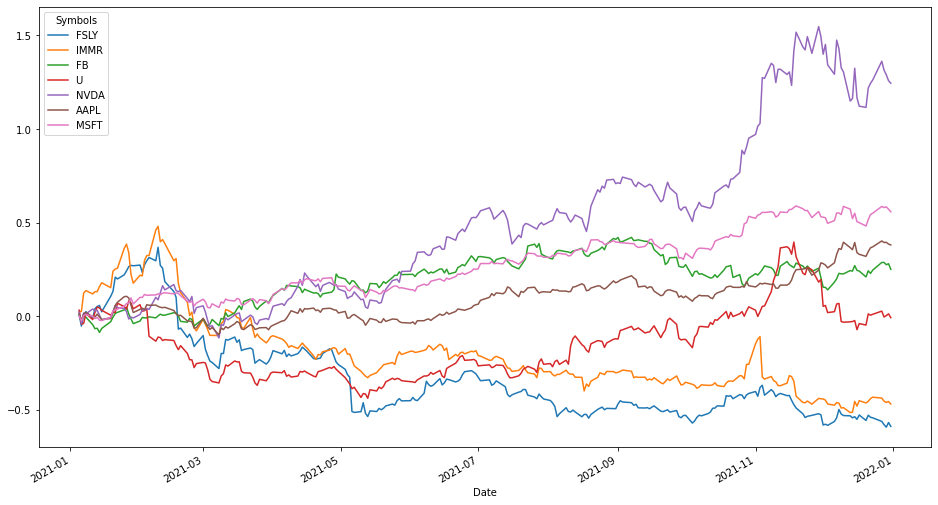

In [8]:
return_series_adj.plot(figsize=(16,9))

In [9]:
### Check for annualised return 
annualized_return = (1+return_series_adj.tail(1))**(1/(1/2))-1
annualized_return

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT
Date,,,,,,,
2021-12-31,-0.830635,-0.717866,0.564127,-0.015073,4.038956,0.906083,1.427051


<AxesSubplot:xlabel='Date'>

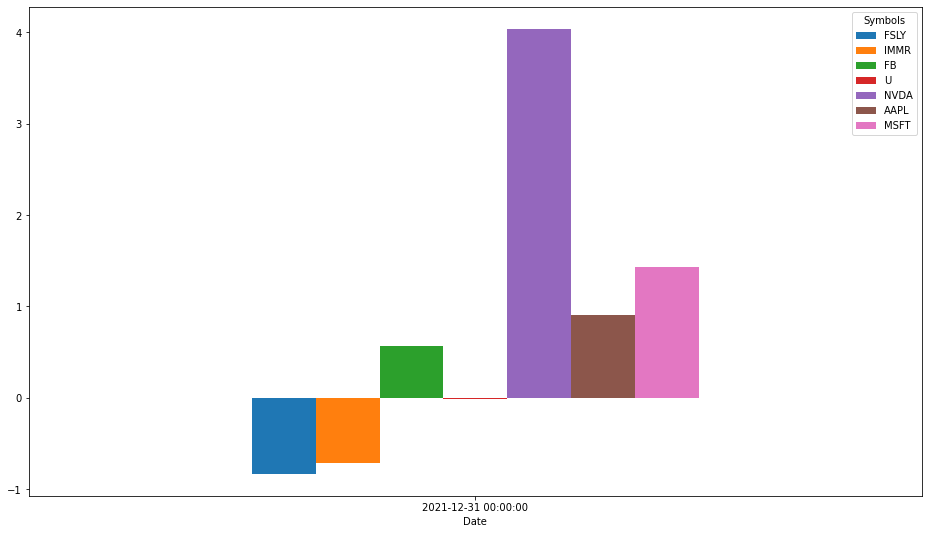

In [10]:
annualized_return.plot.bar(rot=0, figsize=(16,9))

C:\Users\summe\AppData\Local\Temp/ipykernel_7860/863718015.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -2.0, '-200.00%'),
 Text(0, -1.0, '-100.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 1.0, '100.00%'),
 Text(0, 2.0, '200.00%'),
 Text(0, 3.0, '300.00%'),
 Text(0, 4.0, '400.00%'),
 Text(0, 5.0, '500.00%')]

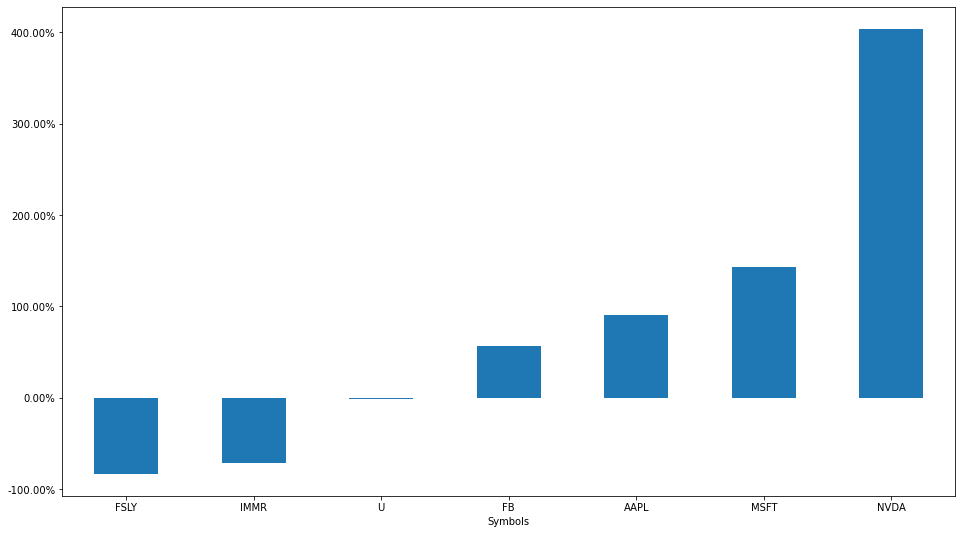

In [11]:
annualized_return = annualized_return.squeeze()
# annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))
type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [12]:
### Find Corr between these stocks
return_series_close = (close_data.pct_change()+ 1).cumprod() - 1
# return_series_close.plot(figsize=(16,9))
return_series_close.corr()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT
Symbols,,,,,,,
FSLY,1.000000,0.958093,-0.773410,-0.014330,-0.633752,-0.498775,-0.694854
IMMR,0.958093,1.000000,-0.745220,-0.118343,-0.705749,-0.589879,-0.760303
FB,-0.773410,-0.745220,1.000000,0.072270,0.588911,0.551741,0.688762
U,-0.014330,-0.118343,0.072270,1.000000,0.673413,0.620160,0.592837
NVDA,-0.633752,-0.705749,0.588911,0.673413,1.000000,0.886576,0.962604
AAPL,-0.498775,-0.589879,0.551741,0.620160,0.886576,1.000000,0.888134
MSFT,-0.694854,-0.760303,0.688762,0.592837,0.962604,0.888134,1.000000


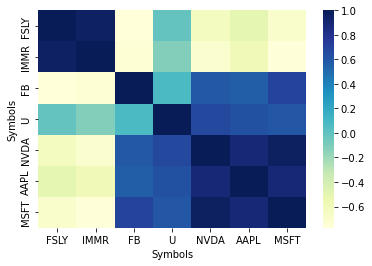

In [13]:
import seaborn as sns
dataplot = sns.heatmap(return_series_close.corr(), cmap="YlGnBu")

In [14]:
### Volatility
ahv = np.sqrt(np.log(close_data / close_data.shift(1)).var()) * np.sqrt(252)
ahv

Symbols
FSLY    0.702763
IMMR    0.619954
FB      0.295573
U       0.543271
NVDA    0.447667
AAPL    0.250076
MSFT    0.209409
dtype: float64

C:\Users\summe\AppData\Local\Temp/ipykernel_7860/3817654803.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, 0.0, '0.00%'),
 Text(0, 0.1, '10.00%'),
 Text(0, 0.2, '20.00%'),
 Text(0, 0.30000000000000004, '30.00%'),
 Text(0, 0.4, '40.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.6000000000000001, '60.00%'),
 Text(0, 0.7000000000000001, '70.00%'),
 Text(0, 0.8, '80.00%')]

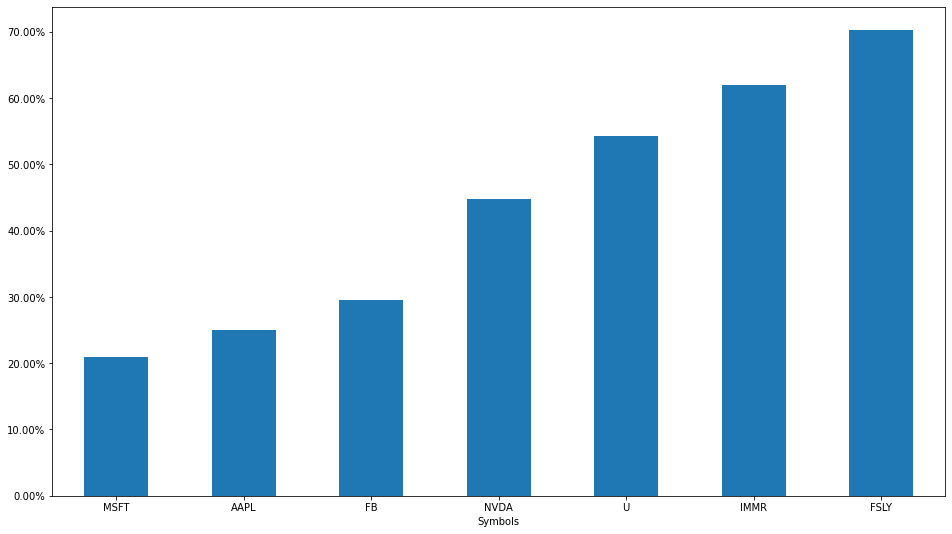

In [15]:
# ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))


# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [18]:
risk_free_ann_ret_rate = 0.01

returns_ts = adj_close_data.pct_change().dropna()
avg_daily_ret = returns_ts.mean()

returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252
avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

#Add the excess return columns for each ETF
returns_ts['Excess_ret_FSLY'] = returns_ts["FSLY"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_IMMR'] = returns_ts["IMMR"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_FB'] = returns_ts["FB"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_U'] = returns_ts["U"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_NVDA'] = returns_ts["NVDA"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_AAPL'] = returns_ts["AAPL"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_MSFT'] = returns_ts["MSFT"] - returns_ts['RiskFree_Rate']

In [19]:
#calculate sharpe ratio

sharpe_FSLY = ((avg_daily_ret['FSLY'] - avg_rf_ret) /returns_ts['Excess_ret_FSLY'].std())*np.sqrt(252)
print("Sharpe Ratio FSLY :\n", sharpe_FSLY.round(2))
sharpe_IMMR = ((avg_daily_ret['IMMR'] - avg_rf_ret) /returns_ts['Excess_ret_IMMR'].std())*np.sqrt(252)
print("Sharpe Ratio IMMR :\n" , sharpe_IMMR.round(2))
sharpe_FB = ((avg_daily_ret['FB'] - avg_rf_ret) /returns_ts['Excess_ret_FB'].std())*np.sqrt(252)
print("Sharpe Ratio FB :\n" , sharpe_FB.round(2))
sharpe_U = ((avg_daily_ret['U'] - avg_rf_ret) /returns_ts['Excess_ret_U'].std())*np.sqrt(252)
print("Sharpe Ratio U :\n", sharpe_U.round(2))
sharpe_NVDA = ((avg_daily_ret['NVDA'] - avg_rf_ret) /returns_ts['Excess_ret_NVDA'].std())*np.sqrt(252)
print("Sharpe Ratio NVDA :\n" , sharpe_NVDA.round(2))
sharpe_AAPL = ((avg_daily_ret['AAPL'] - avg_rf_ret) /returns_ts['Excess_ret_AAPL'].std())*np.sqrt(252)
print("Sharpe Ratio AAPL :\n" , sharpe_AAPL.round(2))
sharpe_MSFT = ((avg_daily_ret['MSFT'] - avg_rf_ret) /returns_ts['Excess_ret_MSFT'].std())*np.sqrt(252)
print("Sharpe Ratio MSFT :\n" , sharpe_MSFT.round(2))

Sharpe Ratio FSLY :
 -0.97
Sharpe Ratio IMMR :
 -0.75
Sharpe Ratio FB :
 0.87
Sharpe Ratio U :
 0.24
Sharpe Ratio NVDA :
 2.0
Sharpe Ratio AAPL :
 1.38
Sharpe Ratio MSFT :
 2.18


In [20]:
flattened_data = pd.read_csv('flattened_data.csv')

In [21]:
from pandas_profiling import ProfileReport
prof = ProfileReport(flattened_data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]